In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! /opt/bin/nvidia-smi

Sun May 22 14:19:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
cd /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/

/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE


In [4]:
!python demo.py --checkpoint-path /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/COCO_local_dst_rgbd_v2_1_frozen.pth --video-rgb /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/video/crop_rgb.mp4 --video-depth /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/video/crop_depth.mp4 --track 1 --smooth 1

model frozen
modelrgbd frozen


In [ ]:
# import json
# import requests
# with open("drive/MyDrive/Calvin-RGBD-human-tracking&HPE/local_datasets/annotation/val_subset_250.json",'r') as load_f:
#   data_dict = json.load(load_f)
# imgs = data_dict['images']
# for i in range(250):
#   url = imgs[i]['coco_url']
#   name = imgs[i]['file_name']
#   path = 'drive/MyDrive/Calvin-RGBD-human-tracking&HPE/local_datasets/val_250/' + name
#   r = requests.get(url, allow_redirects=True)
#   open(path, 'wb').write(r.content)
#   print(i,name)

In [ ]:
# !python gdrive/MyDrive/Calvin-RGBD-human-tracking\&\HPE/scripts/make_val_subset.py --labels gdrive/MyDrive/Calvin-RGBD-human-tracking\&\HPE/local_datasets/person_keypoints_train2017.json --output-name gdrive/MyDrive/Calvin-RGBD-human-tracking\&\HPE/local_datasets/subset_train_annotations.json --num-images 500

In [ ]:
!ls drive/MyDrive/Calvin-RGBD-human-tracking\&\HPE/local_datasets/val_250/ -l | grep "^-" | wc -l

250


In [ ]:
# import os
# from shutil import copy
# import json
# with open("drive/MyDrive/Calvin-RGBD-human-tracking&HPE/local_datasets/subset_train_annotations.json",'r') as load_f:
#   data_dict = json.load(load_f)
# imgs = data_dict['images']
# for i in range(len(imgs)):
#   from_path = 'drive/MyDrive/light_openpose/COCO_HOME/train2017depth/' + imgs[i]['file_name']
#   to_path = 'drive/MyDrive/light_openpose/COCO_HOME/train2017depth_subset/' + imgs[i]['file_name']
#   copy(from_path, to_path)

In [ ]:
!python drive/MyDrive/Calvin-RGBD-human-tracking_HPE/scripts/prepare_train_labels.py --labels drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/self_annotations/RGB_train_self.json --output-name drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/self_annotations/RGB_train_self.pkl

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
depth = cv2.imread('drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/depth_imgs/depth_Explorer_HD720_SN15385_05-00-02.png')
disp_gray = cv2.cvtColor(depth, cv2.COLOR_BGR2GRAY)
img_bgr = cv2.imread('drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGB_imgs/left_Explorer_HD720_SN15385_05-00-02.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgbd = cv2.imread('drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGBD_imgs/left_Explorer_HD720_SN15385_05-00-02.png',-1)
# img_rgbd = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [ ]:
# --checkpoint-path drive/MyDrive/Calvin-RGBD-human-tracking_HPE/checkpoint_iter_370000.pth --weights-only

In [ ]:
!python /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/train_V4x.py  --base-lr 0.0001 --batch-size 12 --log-after 100 --checkpoint-after 100 --val-after 100 --num-refinement-stages 1 --experiment-name /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/COCO_local_dst_rgbd_v4x --train-images-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGBD_imgs/ --prepared-train-labels /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/self_annotations/RGB_train_self.pkl --val-labels /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/self_annotations/RGB_val_self.json --val-images-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGBD_imgs/ --checkpoint-path /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/COCO_rgbd_V2_stage_5.pth --weights-only

In [ ]:
!python /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_V2.py --num-refinement-stages 1 --num-img-input 4 --output-name /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v1_detected.json --labels /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/self_annotations/RGB_val_self.json --images-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGBD_imgs/ --img-save-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_output/local_on_COCO/ --checkpoint-path /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/COCO_local_dst_rgbd_v1_1.pth

time per image in network: 0.014902732589028099
Running test for keypoints results.
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.831
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.959
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.892
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.831
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.858
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.962
 Average Recall     (AR) @[ IoU=0.75      | area=   all

In [ ]:
!python /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val.py --visualize --num-refinement-stages 1 --num-img-input 3 --img-save-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_output/local_output/ --output-name /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_detected.json --labels /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/COCO_subset_annotations/val_subset_250.json --images-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/val_250/ --checkpoint-path /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/checkpoint_iter_370000.pth

In [ ]:
ls /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/

COCO_detected.json
COCO_local_dst_rgbd_v3_detected.json
COCO_local_dst_rgbd_v3_frozen_kpt_detected.json
COCO_local_dst_rgbd_v3_frozen_map_detected.json
COCO_local_dst_rgbd_v3_frozen_map_kpt_detected.json
COCO_local_rgbd_v1_detected.json
COCO_local_rgbd_v2_detected.json
COCO_local_rgbd_v2_frozen_detected.json
COCO_local_rgbd_v2x_detected.json
COCO_local_rgbd_v4_detected.json
COCO_local_rgb_frozen_detected.json
COCO_on_COCO.json
human_detected_COCO_local_rgb_frozen_detected.json
local_model_rgb_frozen_on_COCO.json
new_COCO_detected.json
test.json


In [3]:
ls /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/ -l

total 1577939
-rw------- 1 root root  72232612 Nov  1  2021 checkpoint_iter_101000_depthpath.pth
-rw------- 1 root root  87959810 Oct 19  2021 checkpoint_iter_370000.pth
-rw------- 1 root root  88262510 Nov 19  2021 checkpoint_iter_46000_depth4.pth
-rw------- 1 root root  36403077 Mar 15 04:22 COCO_local_dst_rgb_1_frozen.pth
-rw------- 1 root root  49352433 Mar  8 01:51 COCO_local_dst_rgbd_v1_1.pth
-rw------- 1 root root  88116417 Mar  9 07:20 COCO_local_dst_rgbd_v1_3.pth
-rw------- 1 root root 126881473 Mar  9 11:16 COCO_local_dst_rgbd_v1_5.pth
-rw------- 1 root root  46284519 Mar 16 09:57 COCO_local_dst_rgbd_v2_1_frozen.pth
-rw------- 1 root root  72176191 Mar 16 10:05 COCO_local_dst_rgbd_v2_1.pth
-rw------- 1 root root 110961760 Mar 10 11:27 COCO_local_dst_rgbd_v2_3.pth
-rw------- 1 root root 149729224 Mar 10 13:20 COCO_local_dst_rgbd_v2_5.pth
-rw------- 1 root root  70950139 Apr 20 10:09 COCO_local_dst_rgbd_v2x.pth
-rw------- 1 root root  79497075 Mar 31 09:12 COCO_local_dst_rgbd_v

In [ ]:
!python /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_V2.py --num-refinement-stages 1 --num-img-input 4 --img-save-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_output/RGBD_1_frozen/ --output-name test.json --labels /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/COCO_subset_annotations/val_subset_250.json --images-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/val_250/ --checkpoint-path /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/COCO_local_dst_rgb_1_frozen.pth

In [ ]:
!python /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_V2.py --num-refinement-stages 1 --num-img-input 4 --visualize --img-save-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_output/RGBD_v4_output/ --output-name /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/test.json --labels /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/self_annotations/RGB_val_self.json --images-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGBD_imgs/ --checkpoint-path /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/COCO_local_dst_rgbd_v4.pth

In [ ]:
!python /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/dataset_demo.py --visualize --num-refinement-stages 1 --num-img-input 4 --img-save-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_output/new_RGBD_V4_output/ --output-name /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/new_RGBD_V4_detected.json --file-names /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGB_images.json --images-folder /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/new_RGBD_images/ --checkpoint-path /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/COCO_local_dst_rgbd_v4.pth

In [ ]:
!python /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/demo.py --checkpoint-path /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/checkpoint_iter_370000.pth --images /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/000000111111.jpg

000000111111.jpg detected
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_output/detected_000000111111.jpg


In [ ]:
ls /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_output/RGB_1_frozen/

In [ ]:
import cv2
img = cv2.imread('drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGB_imgs/left_Explorer_HD720_SN15385_19-36-44.png',-1)
img.shape

(734, 1526, 3)

In [ ]:
cd /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/

/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE


In [ ]:
import torch
import collections
from models.with_mobilenet import PoseEstimationWithMobileNet
# net = PoseEstimationWithMobileNet(num_refinement_stages = 1)
# target_state = net.state_dict() #state_dict in the net
# list(target_state.keys())
# target_state['model.0.0.weight'].shape
# print(target_state['model.0.0.weight'].shape)
checkpoint = torch.load('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/COCO_rgbd_V2_stage_5.pth')
# print(checkpoint['state_dict']['model.0.0.weight'].shape)
source_state = checkpoint['state_dict']
# new_target_state = collections.OrderedDict()
# for key, value in source_state.items():
  # new_target_state[key[7:]] = source_state[key]
list(source_state.keys())
# new_target_state = collections.OrderedDict()
# for target_key, target_value in target_state.items():
  # if target_key in source_state and source_state[target_key].size() == target_state[target_key].size():
    # print('Got pre-trained parameters for {}'.format(target_key))
    # x = 'module.'+target_key
    # new_target_state[target_key] = source_state[x]
# #   elif target_key[:19] == 'initial_stage.trunk':
# #     source_key = 'initial_stage.trunk.' + target_key[24:]
# #     print(target_key)
# #     new_target_state[target_key] = source_state[source_key]
# #   elif target_key[:25] == 'refinement_stages.0.trunk':
# #     source_key = 'refinement_stages.0.trunk.' + target_key[30:]
# #     print(target_key)
# #     new_target_state[target_key] = source_state[source_key]
#   else:
#     new_target_state[target_key] = target_state[target_key]
#     print('[WARNING] Not found pre-trained parameters for {}'.format(target_key))
# checkpoint['state_dict'] = new_target_state
# torch.save(checkpoint,'/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/COCO_local_dst_rgbd_v5.pth')

In [ ]:
from models.with_mobilenet_V1 import PoseEstimationWithMobileNet
from torchsummary import summary
import torch
# net = PoseEstimationWithMobileNet(num_refinement_stages = 1)
# target_state = net.state_dict() #state_dict in the net
# list(target_state.keys())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = PoseEstimationWithMobileNet(num_refinement_stages = 1).to(device)
type(net)
summary(net, (4,224,224))

In [ ]:
from modules.load_state import load_state
from models.with_mobilenet_V2 import PoseEstimationWithMobileNet
import torch
net = PoseEstimationWithMobileNet(1)
net_dict = net.state_dict()
dict_name = list(net_dict)
for i, p in enumerate(dict_name):
    print(i, p)
# checkpoint = torch.load('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/trained_models/checkpoint_iter_101000_depthpath.pth')
# load_state(net, checkpoint)

In [ ]:
cd /content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/

/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE


In [ ]:
from modules.evaluate_link import *
from modules.convert_format import *
# from modules.detect_human_V1 import *
# gt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/COCO_subset_annotations/val_subset_250.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/local_model_rgb_frozen_on_COCO.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_on_COCO.json'

gt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/self_annotations/RGB_val_self.json'
pt_json = []
# pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_detected.json')
pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgb_frozen_detected.json')
# pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v1_detected.json')
# pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v2_detected.json')
pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v2_frozen_detected.json')
pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v2x_detected.json')
pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_dst_rgbd_v3_detected.json')
# pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_dst_rgbd_v3_frozen_map_detected.json')
# pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_dst_rgbd_v3_frozen_kpt_detected.json')
# pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_dst_rgbd_v3_frozen_map_kpt_detected.json')
pt_json.append('/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v4_detected.json')
threshold = 0.5
for i in range(len(pt_json)):
  print(pt_json[i])
  evaluate_dst(gt_json,pt_json[i],threshold)
  # detect_body(gt_json,pt_json[i],threshold,save = False)

/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgb_frozen_detected.json
acc_avg:0.8687
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v2_frozen_detected.json
acc_avg:0.8588
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v2x_detected.json
acc_avg:0.8564
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_dst_rgbd_v3_detected.json
acc_avg:0.8493
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v4_detected.json
acc_avg:0.8705


In [ ]:
for i in range(len(pt_json)):
  print(pt_json[i])
  buf = []
  for j in range(10):
    threshold = 0.5 + j * 0.05
    buf.append(evaluate_dst(gt_json,pt_json[i],threshold))
    # buf.append(detect_body(gt_json,pt_json[i],threshold,save = False))
  # print(buf) 
  # print(len(buf))
  print(sum(buf) / len(buf))

/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgb_frozen_detected.json
acc_avg:0.8687
acc_avg:0.8811
acc_avg:0.8905
acc_avg:0.8997
acc_avg:0.9017
acc_avg:0.9060
acc_avg:0.9099
acc_avg:0.9141
acc_avg:0.9174
acc_avg:0.9193
0.900852900989717
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v2_frozen_detected.json
acc_avg:0.8588
acc_avg:0.8683
acc_avg:0.8805
acc_avg:0.8869
acc_avg:0.8877
acc_avg:0.8957
acc_avg:0.8973
acc_avg:0.9024
acc_avg:0.9050
acc_avg:0.9065
0.8889042014804793
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v2x_detected.json
acc_avg:0.8564
acc_avg:0.8709
acc_avg:0.8797
acc_avg:0.8863
acc_avg:0.8932
acc_avg:0.8967
acc_avg:0.8991
acc_avg:0.9014
acc_avg:0.9036
acc_avg:0.9059
0.8893210986225437
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_dst_rgbd_v3_detected.json
acc_avg:0.8493
acc_avg:0.8621
acc_avg:0.8716
acc_avg:0.8821
acc_avg:0.8864
acc_avg:0.89

In [ ]:
from modules.visual_link import *
# gt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/COCO_subset_annotations/val_subset_250.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/local_model_rgb_frozen_on_COCO.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_on_COCO.json'

gt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/self_annotations/RGB_val_self.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_detected.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgb_frozen_detected.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_detected.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_frozen_detected.json'
pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v4_detected.json'
save_path = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGB_imgs/'
output_path = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_output/CMP_RGBD_v4/'
threshold = 0.3
evaluate_dst(gt_json,pt_json,save_path,output_path,threshold)

In [ ]:
for i in range(len(pt_json)):
  print(pt_json[i])
  buf = []
  for j in range(10):
    threshold = 0.5 + j * 0.05
    buf.append(detect_body(gt_json,pt_json[i],threshold,save = False))
  print(sum(buf) / len(buf))

/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_detected.json
acc_avg:0.9760
acc_avg:0.9722
acc_avg:0.9722
acc_avg:0.9684
acc_avg:0.9369
acc_avg:0.9338
acc_avg:0.9111
acc_avg:0.8783
acc_avg:0.8240
acc_avg:0.6760
0.90489898989899
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgb_frozen_detected.json
acc_avg:0.9962
acc_avg:0.9811
acc_avg:0.9735
acc_avg:0.9659
acc_avg:0.9457
acc_avg:0.9331
acc_avg:0.8889
acc_avg:0.8732
acc_avg:0.8058
acc_avg:0.6447
0.9008080808080807
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v1_detected.json
acc_avg:0.9798
acc_avg:0.9692
acc_avg:0.9616
acc_avg:0.9578
acc_avg:0.9402
acc_avg:0.9086
acc_avg:0.9010
acc_avg:0.8568
acc_avg:0.7662
acc_avg:0.5975
0.8838636363636363
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_detected.json
acc_avg:0.9962
acc_avg:0.9924
acc_avg:0.9924
acc_avg:0.9848
acc_avg:0.9528
acc_avg:0.9250
acc_avg:0.8934
acc_avg:0.85

In [ ]:
from modules.visual_link import *
# from modules.convert_format import *
# from modules.detect_human import *
gt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/annotation/self_annotations/RGB_val_self.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_detected.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgb_frozen_detected.json'
# pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_detected.json'
pt_json = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/val_output/COCO_local_rgbd_v4_detected.json'
save_path = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGB_imgs/'
output_path = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/'
threshold = 0.3
evaluate_dst(gt_json,pt_json,save_path,output_path,threshold)

/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/40039.png
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/50063.png
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/50052.png
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/40043.png
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/30028.png
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/193108.png
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/40058.png
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/40067.png
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/30039.png
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/40016.png
/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/img_putput/CMP_RGBD_v4/40089.png
/content/drive/MyDrive/Calvin-RGBD-human-t

Lupperleg [[959.5, 392.5], [946.5, 522.5]]
Llowerleg [[946.5, 522.5], [905.5, 679.5]]
image_id: 193252   acc_img:0.6667 20 / 30


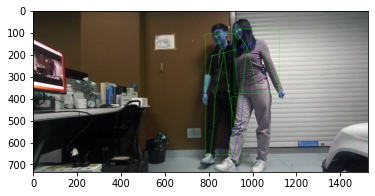

In [ ]:
from modules.visual_link import *
import matplotlib.pyplot as plt
img_path = '/content/drive/MyDrive/Calvin-RGBD-human-tracking_HPE/local_datasets/RGB_imgs/left_Explorer_HD720_SN15385_19-32-52.png'
img = evaluate_single(gt_json,pt_json,193252,img_path,0.3)
plt.imshow(img)
plt.show()